In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from collections import defaultdict

In [2]:
with open('concatenated_abridged.jsonl', 'r') as json_file:
    json_strings = list(json_file)

In [3]:
json_list = []
for tweet in json_strings:
    json_list.append(json.loads(tweet))

In [4]:
df = pd.DataFrame(json_list)

In [5]:
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,Tue Sep 29 23:59:56 +0000 2020,1311093385688735744,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
1,Tue Sep 29 23:59:58 +0000 2020,1311093394400333824,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN
2,Wed Sep 30 00:00:00 +0000 2020,1311093401652277252,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,None,...,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
3,Wed Sep 30 00:00:02 +0000 2020,1311093410737070086,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN
4,Wed Sep 30 00:00:04 +0000 2020,1311093419100561408,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [7]:
df.drop(['id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str'], axis=1, inplace=True)

In [8]:
df.head()

,created_at,id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,2020-09-29 23:59:56+00:00,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,None,...,{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
1,2020-09-29 23:59:58+00:00,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN
2,2020-09-30 00:00:00+00:00,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,None,...,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
3,2020-09-30 00:00:02+00:00,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN
4,2020-09-30 00:00:04+00:00,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN


In [9]:
df2 = df[['id', 'full_text', 'retweet_count', 'favorite_count']]

In [10]:
df2.head()

,id,full_text,retweet_count,favorite_count
0,1311093385688735744,Biden a professional debater?? Hardly!! More ...,0,0
1,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,1,0
2,1311093401652277252,How can Biden stand a chance against Trump in ...,25,100
3,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,351,0
4,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,15672,0


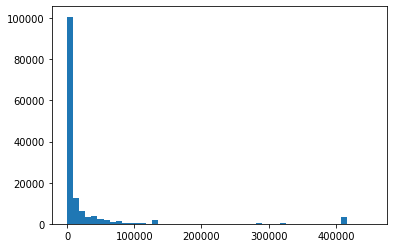

In [11]:
plt.hist(df2['retweet_count'], bins=50);

In [12]:
# it was a big deal when Trump tweated about his diagnosis
df2[df2['retweet_count'] > 400000]['full_text'].iloc[1]

'RT @realDonaldTrump: Tonight, @FLOTUS and I tested positive for COVID-19. We will begin our quarantine and recovery process immediately. We…'

In [13]:
print("Biden is mentioned", len(df2[(df2['full_text'].str.contains('Biden'))]), 'times')

Biden is mentioned 36334 times


In [14]:
print("Trump is mentioned", len(df2[(df2['full_text'].str.contains('Trump'))]), 'times')

Trump is mentioned 75992 times


In [15]:
len(df2[(df2['full_text'].str.contains('Trump|Biden', regex=True))])

98971

In [16]:
df_originals = df[df['retweeted_status'].isna()]

In [17]:
df_originals.head()

,created_at,id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,2020-09-29 23:59:56+00:00,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,None,...,{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
2,2020-09-30 00:00:00+00:00,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,None,...,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
11,2020-09-30 00:00:17+00:00,1311093473819242496,@laggerific @jondoc900 @JoeBiden You may get b...,False,"[33, 132]","{'hashtags': [{'text': 'Trump2020', 'indices':...","<a href=""http://twitter.com/download/android"" ...",1.311090e+18,1.850261e+08,laggerific,...,NaN,0,1,False,False,NaN,en,NaN,NaN,NaN
17,2020-09-30 00:00:29+00:00,1311093523794591744,@rodala2904 @eleazar_arocha Las causas de Trum...,False,"[28, 69]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.311092e+18,7.807069e+07,rodala2904,...,NaN,0,0,False,False,NaN,es,NaN,NaN,NaN
24,2020-09-30 00:00:42+00:00,1311093578563641344,@GOPChairwoman Who does Donald Trump owe money...,False,"[15, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.311074e+18,2.353606e+09,GOPChairwoman,...,NaN,0,0,False,False,NaN,en,NaN,NaN,NaN


In [18]:
df.head()

,created_at,id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,2020-09-29 23:59:56+00:00,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,None,...,{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
1,2020-09-29 23:59:58+00:00,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN
2,2020-09-30 00:00:00+00:00,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,None,...,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
3,2020-09-30 00:00:02+00:00,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN
4,2020-09-30 00:00:04+00:00,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN


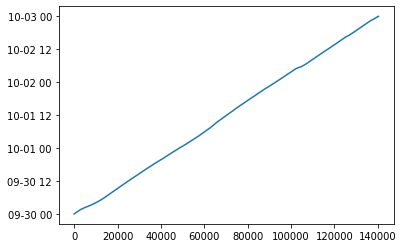

In [19]:
df['created_at'].plot()

In [20]:
hashtag_counts = defaultdict(int)
df['hashtags'] = np.empty((len(df), 0)).tolist()
for idx, tweet_entities in enumerate(df['entities']):
    for k, v in tweet_entities.items():
        if k == 'hashtags':
            for d in v:
                df['hashtags'].iloc[idx].append(d['text'])
                hashtag_counts[d['text']] += 1

In [21]:
hashtag_counts

defaultdict(int,
            {'PresidentialDebate': 293,
             'Debates2020': 2047,
             'TrumpIsANationalDisgrace': 24,
             'VarneyCo': 2,
             '2020Debate': 3,
             'Truckers4Trump': 7,
             'MaduroNuestraVozEnLaONU': 1,
             'Trump2020': 440,
             'BidensShitStorm': 1,
             'DebateTuesday': 35,
             'PresidentialDebate2020': 171,
             'ByeRudy': 11,
             'SleepyJoe': 26,
             'CrookedHillary': 6,
             'Trump': 574,
             'MAGA': 392,
             'TrumpTrain2020': 3,
             'AAG': 4,
             'AAG2020': 4,
             'JornalDaRecord': 2,
             'JR24H': 2,
             'jornaldacultura': 1,
             'ArgentinaSupportsTrump': 26,
             'TrumpPence2020': 21,
             'Debate2020': 173,
             'Biden': 250,
             'Hawkins': 4,
             'Jorgensen': 4,
             'YACpolls': 4,
             'Elecciones2020': 6,
       

In [22]:
for k, v in hashtag_counts.items():
    if v > 150:
        print(k, v)

PresidentialDebate 293
Debates2020 2047
Trump2020 440
PresidentialDebate2020 171
Trump 574
MAGA 392
Debate2020 173
Biden 250
TrumpMeltdown 162
COVID19 450
debates 227
BidenHarris2020 180
JoeBiden 183
BidenWonTheDebate 196
TrumpHasCovid 460


In [23]:
df.head()

,created_at,id,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries,hashtags
0,2020-09-29 23:59:56+00:00,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,None,...,0,0,False,False,False,en,NaN,NaN,NaN,[]
1,2020-09-29 23:59:58+00:00,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN,"[PresidentialDebate, Debates2020, TrumpIsANati..."
2,2020-09-30 00:00:00+00:00,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,None,...,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN,"[VarneyCo, 2020Debate]"
3,2020-09-30 00:00:02+00:00,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN,[]
4,2020-09-30 00:00:04+00:00,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,None,...,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN,[]


In [24]:
# df['num_hashtags'] = int()

In [25]:
# df.head()

In [26]:
# for idx, hashtags in enumerate(df['hashtags']):
#     df['num_hashtags'].iloc[idx] = len(hashtags)

In [27]:
# plt.scatter(x=df['num_hashtags'], y=df['retweet_count'])

In [29]:
approval_polls_df = pd.read_csv('president_approval_polls.csv')

In [31]:
approval_polls_df.head()

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,135425,72195,NaN,11,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,1430,Liberty Nation,Rasmussen Reports/Pulse Opinion Research,...,10/26/20,10/28/20,NaN,True,10/29/20 09:21,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
1,135479,72216,NaN,11,Donald Trump,1528,AtlasIntel,NaN,NaN,AtlasIntel,...,10/26/20,10/28/20,NaN,NaN,10/29/20 13:24,NaN,https://projects.fivethirtyeight.com/polls/202...,538,46.1,52.7
2,135144,72083,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,...,10/25/20,10/27/20,NaN,NaN,10/28/20 09:12,NaN,https://docs.cdn.yougov.com/nzc8dt85gn/econTab...,538,42.0,57.0
3,135145,72083,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,...,10/25/20,10/27/20,NaN,NaN,10/28/20 09:12,NaN,https://docs.cdn.yougov.com/nzc8dt85gn/econTab...,538,42.0,56.0
4,135160,72086,NaN,11,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,1430,Liberty Nation,Rasmussen Reports/Pulse Opinion Research,...,10/25/20,10/27/20,NaN,True,10/28/20 09:35,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0


In [35]:
approval_polls_df['start_date'] = pd.to_datetime(approval_polls_df['start_date'])

In [36]:
approval_polls_df['end_date'] = pd.to_datetime(approval_polls_df['end_date'])

In [38]:
approval_polls_df['start_date'].iloc[0]

Timestamp('2020-10-26 00:00:00')

In [39]:
approval_polls_df.head()

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
0,135425,72195,NaN,11,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,1430,Liberty Nation,Rasmussen Reports/Pulse Opinion Research,...,2020-10-26,2020-10-28,NaN,True,10/29/20 09:21,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0
1,135479,72216,NaN,11,Donald Trump,1528,AtlasIntel,NaN,NaN,AtlasIntel,...,2020-10-26,2020-10-28,NaN,NaN,10/29/20 13:24,NaN,https://projects.fivethirtyeight.com/polls/202...,538,46.1,52.7
2,135144,72083,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,...,2020-10-25,2020-10-27,NaN,NaN,10/28/20 09:12,NaN,https://docs.cdn.yougov.com/nzc8dt85gn/econTab...,538,42.0,57.0
3,135145,72083,NaN,11,Donald Trump,568,YouGov,352,Economist,YouGov,...,2020-10-25,2020-10-27,NaN,NaN,10/28/20 09:12,NaN,https://docs.cdn.yougov.com/nzc8dt85gn/econTab...,538,42.0,56.0
4,135160,72086,NaN,11,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,1430,Liberty Nation,Rasmussen Reports/Pulse Opinion Research,...,2020-10-25,2020-10-27,NaN,True,10/28/20 09:35,NaN,http://www.rasmussenreports.com/public_content...,538,52.0,47.0


In [47]:
approval_polls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   question_id           9728 non-null   int64         
 1   poll_id               9728 non-null   int64         
 2   state                 0 non-null      float64       
 3   politician_id         9728 non-null   int64         
 4   politician            9728 non-null   object        
 5   pollster_id           9728 non-null   int64         
 6   pollster              9728 non-null   object        
 7   sponsor_ids           4059 non-null   object        
 8   sponsors              4059 non-null   object        
 9   display_name          9728 non-null   object        
 10  pollster_rating_id    9718 non-null   float64       
 11  pollster_rating_name  9718 non-null   object        
 12  fte_grade             9452 non-null   object        
 13  sample_size       

In [50]:
approval_polls_df['fte_grade'].unique()

array(['C+', 'B/C', 'B', 'B-', nan, 'A', 'A-', 'D-', 'C-', 'B+', 'A+',
       'C', 'A/B', 'C/D', 'D+'], dtype=object)

In [53]:
approval_polls_df[(approval_polls_df['start_date'] > '2020-09-25') 
                  & (approval_polls_df['end_date'] < '2020-10-05') 
                  & (approval_polls_df['fte_grade'].isin(['A+', 'A', 'A-', 'A/B', 
                                                          'B+', 'B', 'B-', 'B/C', 
                                                          'C+']))]

,question_id,poll_id,state,politician_id,politician,pollster_id,pollster,sponsor_ids,sponsors,display_name,...,start_date,end_date,sponsor_candidate,tracking,created_at,notes,url,source,yes,no
128,132064,70628,NaN,11,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,2020-10-02,2020-10-04,NaN,NaN,10/7/20 08:14,NaN,https://assets.morningconsult.com/wp-uploads/2...,538,45.0,54.0
129,131964,70581,NaN,11,Donald Trump,1361,SSRS,143,CNN,CNN/SSRS,...,2020-10-01,2020-10-04,NaN,NaN,10/5/20 17:01,NaN,http://cdn.cnn.com/cnn/2020/images/10/05/rel12...,538,40.0,57.0
130,131972,70581,NaN,11,Donald Trump,1361,SSRS,143,CNN,CNN/SSRS,...,2020-10-01,2020-10-04,NaN,NaN,10/5/20 20:44,NaN,http://cdn.cnn.com/cnn/2020/images/10/05/rel12...,538,40.0,57.0
131,135408,70581,NaN,11,Donald Trump,1361,SSRS,143,CNN,CNN/SSRS,...,2020-10-01,2020-10-04,NaN,NaN,10/29/20 08:37,NaN,https://cdn.cnn.com/cnn/2020/images/10/28/rel1...,538,40.0,58.0
132,131970,70586,NaN,11,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2020-10-01,2020-10-04,NaN,NaN,10/5/20 18:10,NaN,https://assets.morningconsult.com/wp-uploads/2...,538,42.0,54.0
133,131624,70556,NaN,11,Donald Trump,399,Rasmussen Reports/Pulse Opinion Research,1334,Whatfinger News,Rasmussen Reports/Pulse Opinion Research,...,2020-09-30,2020-10-04,NaN,True,10/5/20 09:54,NaN,http://www.rasmussenreports.com/public_content...,538,46.0,53.0
136,132169,70675,NaN,11,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2020-09-28,2020-10-04,NaN,True,10/8/20 10:16,NaN,https://morningconsult.com/form/global-leader-...,538,41.0,54.0
137,131579,70503,NaN,11,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,2020-10-02,2020-10-03,NaN,NaN,10/3/20 18:30,NaN,https://morningconsult.com/form/reaction-poll-...,538,40.0,58.0
138,131580,70503,NaN,11,Donald Trump,1189,Morning Consult,538,Politico,Morning Consult,...,2020-10-02,2020-10-03,NaN,NaN,10/3/20 18:30,NaN,https://morningconsult.com/form/reaction-poll-...,538,40.0,58.0
139,132168,70674,NaN,11,Donald Trump,1189,Morning Consult,NaN,NaN,Morning Consult,...,2020-09-27,2020-10-03,NaN,True,10/8/20 10:16,NaN,https://morningconsult.com/form/global-leader-...,538,41.0,54.0
